In [1]:
import nilearn
from nibabel.testing import data_path
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
import os
from nilearn import surface
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import hcp_utils as hcp
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from surfplot.plotting import Plot
from icc_utils import *
from hyppo.discrim import DiscrimOneSample

/Users/VictoriaShevchenko/opt/miniconda3/envs/neuro/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [11]:
subjects = ["100206", "100307", "100408", "100610", "101006"]
gradient_list = []
for subject in subjects:
    gradient = np.load("HCP/Gradients/%s/%s.pca.ses1.s02mm.npy" % (subject, subject))
    gradient_list.append(gradient.T)

gradients_ses1 = np.stack((gradient_list))

gradient_list = []
for subject in subjects:
    gradient = np.load("HCP/Gradients/%s/%s.pca.ses2.s02mm.npy" % (subject, subject))
    gradient_list.append(gradient.T)

gradients_ses2 = np.stack((gradient_list))

margulies_grads = np.load('margulies_grads_32K.npy').T

In [ ]:
disp_all_50 = np.load("DispersionAllSubj_50_neighbours.npy")
disp_100206_50 = np.load("PCAGradDispersion_100206_50_neighbours.npy")
disp_100307_50 = np.load("PCAGradDispersion_100307_50_neighbours.npy")


In [ ]:
disp_all_50.shape

(1366476,)

In [ ]:
subjects = np.loadtxt("SubjectsCompleteData.txt", dtype= str)[:500]

In [ ]:
subject_labs = [[i] * 10 for i in subjects[:50]]
subject_labs = sum(subject_labs, [])

In [2]:
N_Neighbours = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
filenames = ["./Discriminability/discrim_%s.csv" %n_neighbours for n_neighbours in  N_Neighbours]
discrim_df = pd.concat(map(pd.read_csv, filenames))

In [3]:
discrim_df

,n_neighbours,stat,p_value
0,50,0.503809,0.000999
0,100,0.503844,0.000999
0,200,0.503862,0.000999
0,400,0.503881,0.000999
0,800,0.503851,0.000999
0,1600,0.503737,0.000999
0,3200,0.503531,0.000999
0,6400,0.503304,0.000999
0,12800,0.504127,0.000999


<AxesSubplot: xlabel='n_neighbours', ylabel='stat'>

Text(0, 0.5, 'Discr')

Text(0.5, 0, 'N of Neighbours')

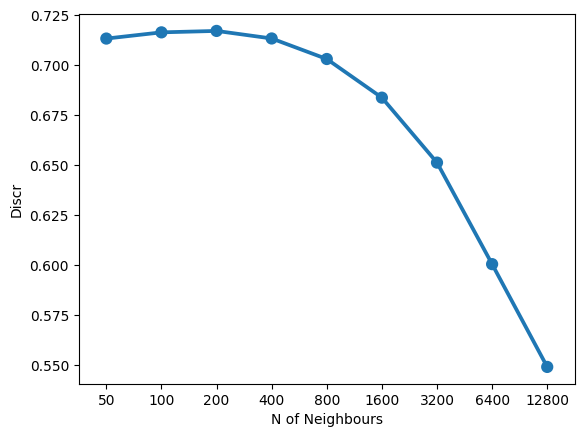

In [71]:
sns.pointplot(discrim_df, x = "n_neighbours", y ="stat")
plt.ylabel("Discr")
plt.xlabel("N of Neighbours")

In [8]:
import numpy as np
import pytest
from numpy.testing import assert_almost_equal, assert_raises, assert_warns
import scipy.io

def calculate_p_value(values, value):
    mean = values.mean()
    std = values.std()
    z = (value - mean)/std
    p = 2 * (1 - scipy.stats.norm(0, 1).cdf(abs(z)))
    return p

# run a test on discriminable subjects
x_diff = np.concatenate((np.zeros((50, 2)), np.ones((50, 2))), axis=0)
y_diff = np.concatenate((np.zeros(50), np.ones(50)), axis=0)

obs_stat = 1.0
obs_p = 0.0909090909090909

stat_diff, p_diff, perm_dist = DiscrimOneSample().test(x_diff, y_diff, workers= -1, reps = 10000)
stat_diff, p_diff


(1.0, 9.999000099990002e-05)

In [60]:
x_diff = np.concatenate((np.zeros((50, 2)), np.ones((50, 2))), axis=0)
y_diff = np.concatenate((np.zeros(50), np.ones(50)), axis=0)

stat_diff, p_diff, perm_dist = DiscrimOneSample().test(x_diff, y_diff, workers= -1, reps = 1000)
stat_diff, p_diff

(1.0, 0.000999000999000999)

<AxesSubplot: ylabel='Count'>

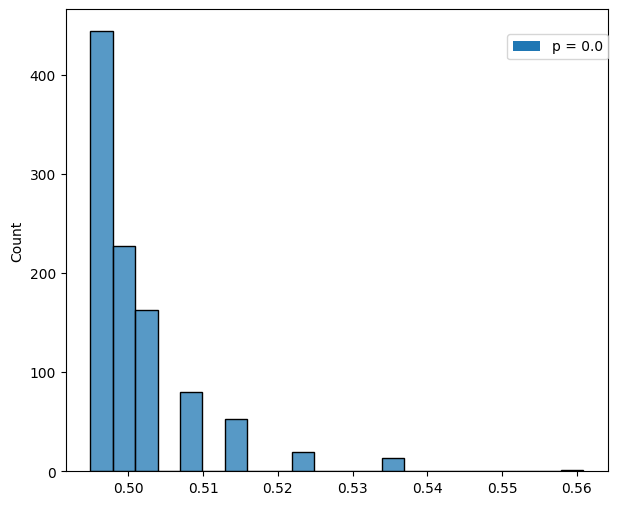

In [82]:
stat = stat_diff
null_dist = perm_dist
#calculate_p_value(null_dist, stat.values[0])

fig = plt.figure(figsize=(7,6))
fig.patch.set_facecolor('white')
sns.histplot(null_dist, binwidth = 0.003)
#plt.axvline(x = stat, ymax = 0.5, c = "darkgreen")
fig.legend(labels=['p = %s' %calculate_p_value(null_dist, stat)], bbox_to_anchor=(0, 0.35, 0.91, 0.5))

In [46]:
n_neighbours = 400
stat = discrim_df[discrim_df["n_neighbours"] == n_neighbours]["stat"]
null_dist = np.load("./Discriminability/null_distribution_%s_neighbours.npy" % n_neighbours)
calculate_p_value(null_dist, stat.values[0])

0.0

In [39]:
stat.values[0]

0.549073519038076

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

<AxesSubplot: ylabel='Count'>

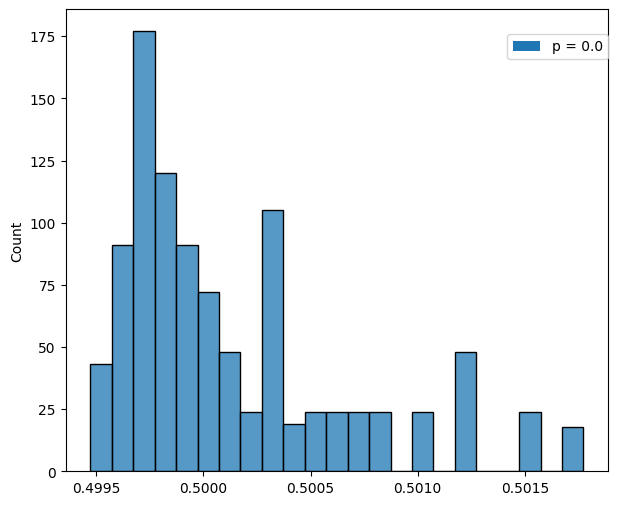

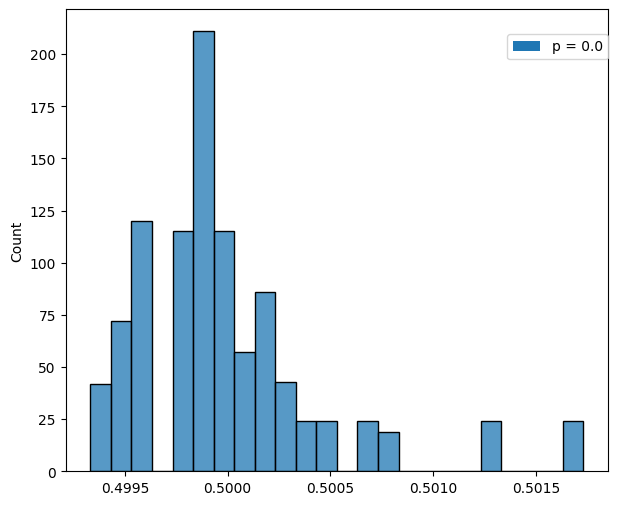

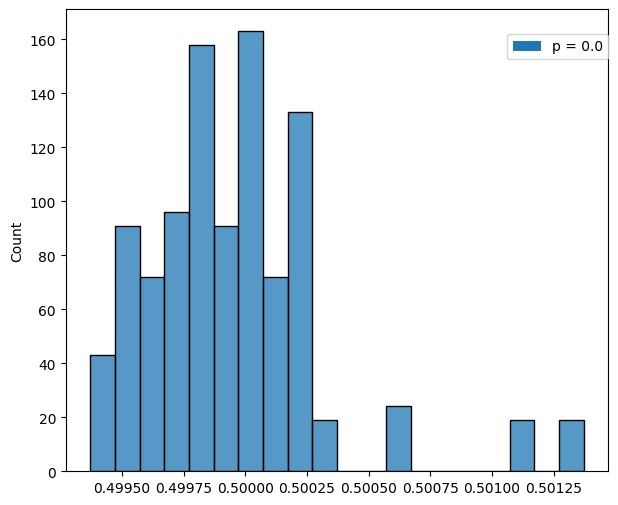

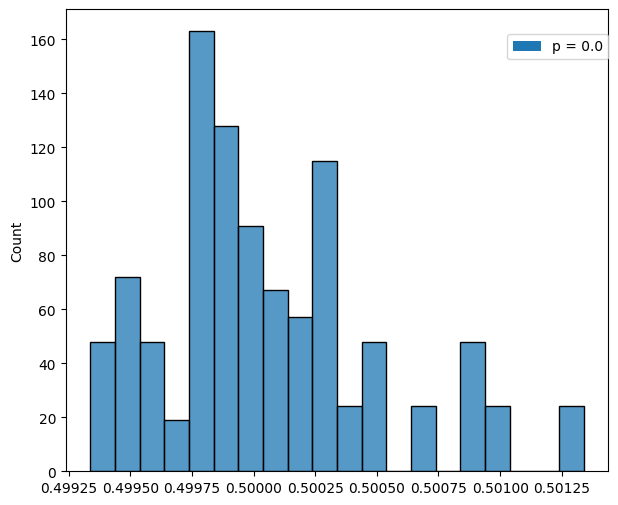

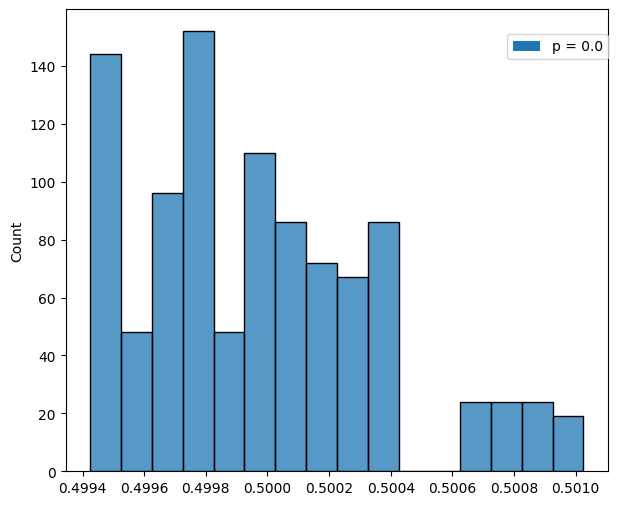

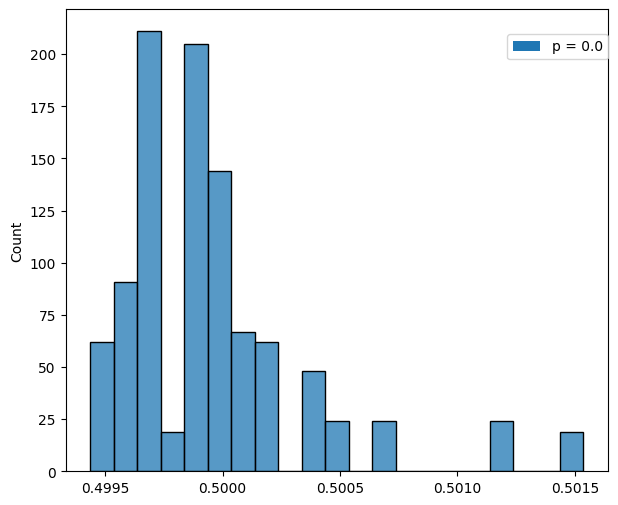

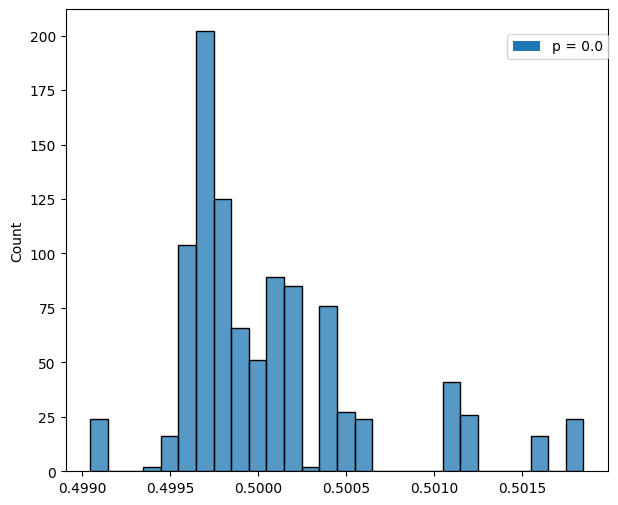

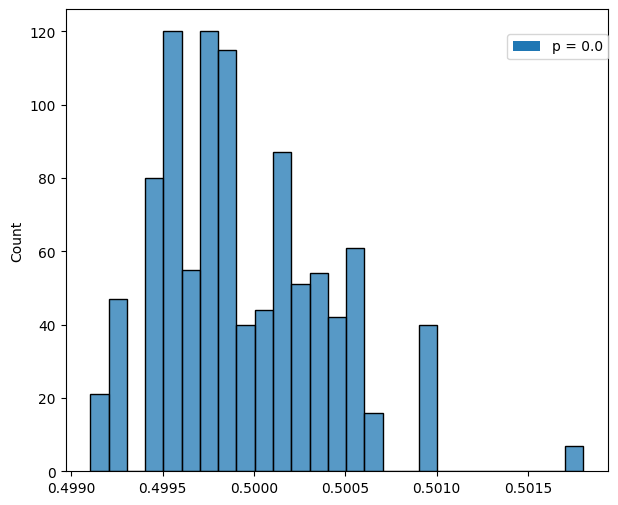

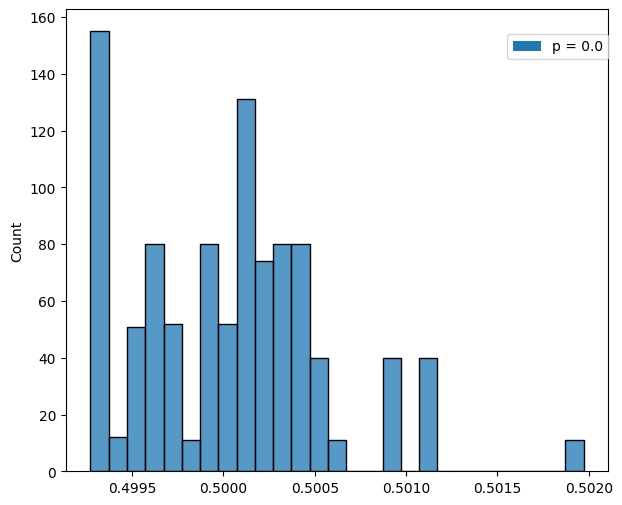

In [77]:
import seaborn as sns

for  n_neighbours in N_Neighbours:
    stat = discrim_df[discrim_df["n_neighbours"] == n_neighbours]["stat"]
    null_dist = np.load("./Discriminability/null_distribution_%s_neighbours.npy" % n_neighbours)
    #calculate_p_value(null_dist, stat.values[0])

    fig = plt.figure(figsize=(7,6))
    fig.patch.set_facecolor('white')
    sns.histplot(null_dist, binwidth = 0.0001)
    #plt.axvline(x = stat.values[0], ymax = 0.5, c = "darkgreen")
    fig.legend(labels=['p = %s' %calculate_p_value(null_dist, stat.values[0])], bbox_to_anchor=(0, 0.35, 0.91, 0.5))


In [51]:
x = np.concatenate([np.zeros((50, 2)), np.ones((50, 2))], axis=0)
y = np.concatenate([np.zeros(50), np.ones(50)], axis=0)
'%.1f, %.2f' % DiscrimOneSample().test(x, y) # doctest: +SKIP
'1.0, 0.00'



'1.0, 0.00'

'1.0, 0.00'